In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Import requests, citipy, api key & datetime
import requests
from citipy import citipy
from config import Weather_api_key
from datetime import datetime

In [2]:
# Create random 1500 longitudes & 1500 latitudes & zip them 
lats = np.random.uniform(low = -90.00, high = 90.00, size=1500)
lngs = np.random.uniform(low=-180.00, high=180.00, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
# Create a coordinates list to carry the zipped coordinates
coordinates = list(lat_lngs)

In [4]:
# Create an empty list to hold the cities
cities = []
# Find the nearest city for each lat-long combination, then add each unique city name to the list, 
#then check the length of the list 
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    if city not in cities:
        cities.append(city)
len(cities)

590

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=" + Weather_api_key

In [6]:

city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | amga
Processing Record 2 of Set 1 | torbay
Processing Record 3 of Set 1 | khatanga
Processing Record 4 of Set 1 | shiraz
Processing Record 5 of Set 1 | geraldton
Processing Record 6 of Set 1 | kolo
Processing Record 7 of Set 1 | kenora
Processing Record 8 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 9 of Set 1 | hobart
Processing Record 10 of Set 1 | bluff
Processing Record 11 of Set 1 | carnarvon
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | mahebourg
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | port alfred
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | margate
Processing Record 18 of Set 1 | vaini
Processing Record 19 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 20 of Set 1 | pitimbu
Processing Record 21 of Set 1 | nome
Processing Record 22 of Set 1 | warqla
Ci

Processing Record 39 of Set 4 | amderma
City not found. Skipping...
Processing Record 40 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 41 of Set 4 | oyonnax
Processing Record 42 of Set 4 | ayabe
Processing Record 43 of Set 4 | phan thiet
Processing Record 44 of Set 4 | hualmay
Processing Record 45 of Set 4 | kidal
Processing Record 46 of Set 4 | ormara
Processing Record 47 of Set 4 | komsomolskiy
Processing Record 48 of Set 4 | tezu
Processing Record 49 of Set 4 | camacha
Processing Record 50 of Set 4 | bapatla
Processing Record 1 of Set 5 | hambantota
Processing Record 2 of Set 5 | beringovskiy
Processing Record 3 of Set 5 | solsvik
City not found. Skipping...
Processing Record 4 of Set 5 | mbandaka
Processing Record 5 of Set 5 | cayenne
Processing Record 6 of Set 5 | rawson
Processing Record 7 of Set 5 | chara
Processing Record 8 of Set 5 | miri
Processing Record 9 of Set 5 | cotonou
Processing Record 10 of Set 5 | aykhal
Processing Record 11 of Set 5 | minuri


Processing Record 30 of Set 8 | walvis bay
Processing Record 31 of Set 8 | valdivia
Processing Record 32 of Set 8 | nanticoke
Processing Record 33 of Set 8 | nioro
Processing Record 34 of Set 8 | la ronge
Processing Record 35 of Set 8 | mendota
Processing Record 36 of Set 8 | stornoway
Processing Record 37 of Set 8 | ilinsko-podomskoye
City not found. Skipping...
Processing Record 38 of Set 8 | kirando
Processing Record 39 of Set 8 | yenotayevka
Processing Record 40 of Set 8 | tilichiki
Processing Record 41 of Set 8 | balkhash
Processing Record 42 of Set 8 | eruwa
Processing Record 43 of Set 8 | kysyl-syr
Processing Record 44 of Set 8 | sterling
Processing Record 45 of Set 8 | la grande
Processing Record 46 of Set 8 | doha
Processing Record 47 of Set 8 | ugoofaaru
Processing Record 48 of Set 8 | contamana
Processing Record 49 of Set 8 | samarai
Processing Record 50 of Set 8 | kiama
Processing Record 1 of Set 9 | belaya gora
Processing Record 2 of Set 9 | ucluelet
Processing Record 3 of

Processing Record 18 of Set 12 | uk
City not found. Skipping...
Processing Record 19 of Set 12 | tosya
Processing Record 20 of Set 12 | mastic beach
Processing Record 21 of Set 12 | luanda
Processing Record 22 of Set 12 | tebingtinggi
Processing Record 23 of Set 12 | el tocuyo
Processing Record 24 of Set 12 | airai
Processing Record 25 of Set 12 | hirado
Processing Record 26 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 27 of Set 12 | neftcala
Processing Record 28 of Set 12 | la palma
Processing Record 29 of Set 12 | waipawa
Processing Record 30 of Set 12 | mpika
Processing Record 31 of Set 12 | pochutla
Processing Record 32 of Set 12 | san policarpo
Processing Record 33 of Set 12 | arlit
Processing Record 34 of Set 12 | chany
Processing Record 35 of Set 12 | maku
Processing Record 36 of Set 12 | tidore
City not found. Skipping...
Processing Record 37 of Set 12 | port alberni
Processing Record 38 of Set 12 | maunabo
Processing Record 39 of Set 12 | inhamb

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Amga,60.8953,131.9608,-6.59,99,100,2.08,RU,2021-04-05 17:29:09
1,Torbay,47.6666,-52.7314,42.01,100,90,13.80,CA,2021-04-05 17:28:43
2,Khatanga,71.9667,102.5000,4.71,85,79,9.73,RU,2021-04-05 17:27:08
3,Shiraz,29.6036,52.5388,62.60,15,0,6.91,IR,2021-04-05 17:30:26
4,Geraldton,-28.7667,114.6000,62.60,88,0,3.44,AU,2021-04-05 17:28:19
5,Kolo,52.2002,18.6387,35.01,96,100,1.99,PL,2021-04-05 17:31:29
6,Kenora,49.8167,-94.4337,55.40,33,90,8.05,CA,2021-04-05 17:30:41
7,Hobart,-42.8794,147.3294,51.01,87,0,3.44,AU,2021-04-05 17:27:03
8,Bluff,-46.6000,168.3333,51.91,75,90,18.50,NZ,2021-04-05 17:31:30
9,Carnarvon,-24.8667,113.6333,75.20,88,99,12.66,AU,2021-04-05 17:27:55


In [8]:
new_order_columns = [ "City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_order_columns]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Amga,RU,2021-04-05 17:29:09,60.8953,131.9608,-6.59,99,100,2.08
1,Torbay,CA,2021-04-05 17:28:43,47.6666,-52.7314,42.01,100,90,13.80
2,Khatanga,RU,2021-04-05 17:27:08,71.9667,102.5000,4.71,85,79,9.73
3,Shiraz,IR,2021-04-05 17:30:26,29.6036,52.5388,62.60,15,0,6.91
4,Geraldton,AU,2021-04-05 17:28:19,-28.7667,114.6000,62.60,88,0,3.44


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [11]:
import time

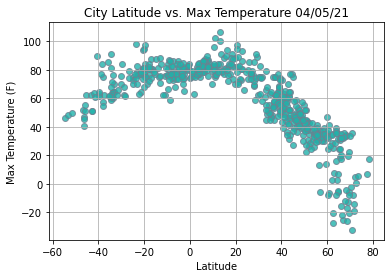

In [12]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps, color="lightseagreen",
            edgecolor="slategray", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

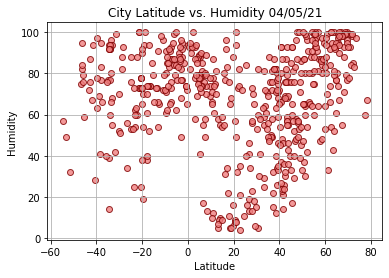

In [13]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(lats,
            humidity, color="lightcoral",
            edgecolor="maroon", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

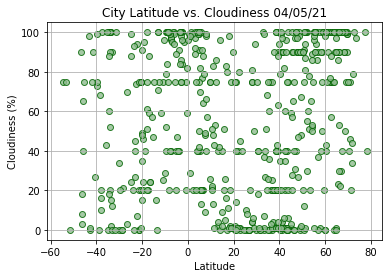

In [14]:
# Build the scatter plot for latitude vs. Cloudiness
plt.scatter(lats,
            cloudiness, color="darkseagreen",
            edgecolor="darkgreen", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

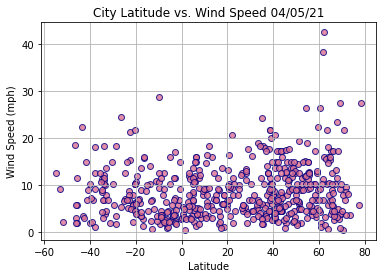

In [15]:
# Build the scatter plot for latitude vs. Wind speed
plt.scatter(lats,
            wind_speed, color="palevioletred",
            edgecolor="navy", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [16]:
# Import linregress
from scipy.stats import linregress

In [17]:
# create two dataframes for the northern & southern hemispheres

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<= 0)]


In [18]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

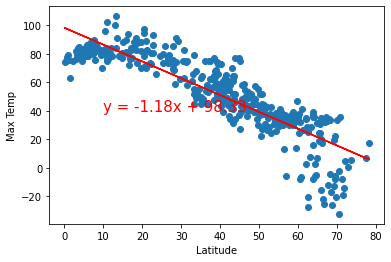

In [19]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))
plt.show()

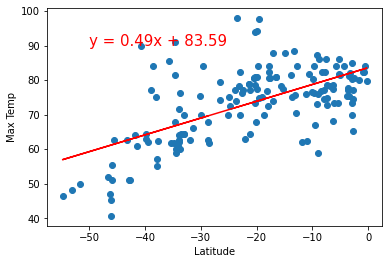

In [20]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))
plt.show()

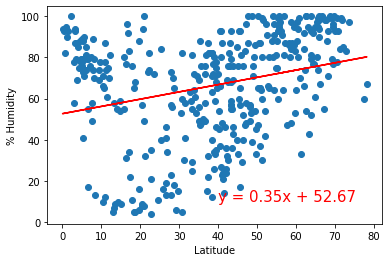

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

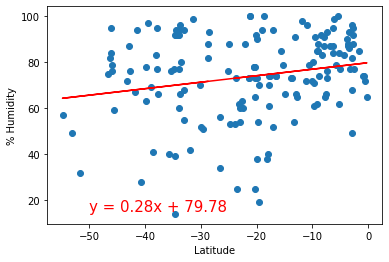

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

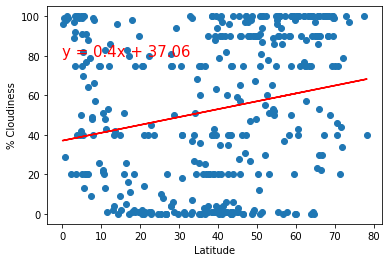

In [23]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(0,80))

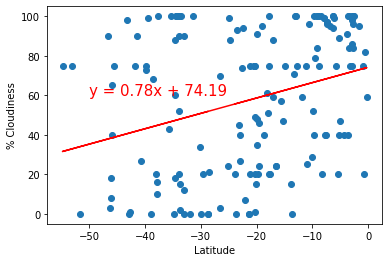

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

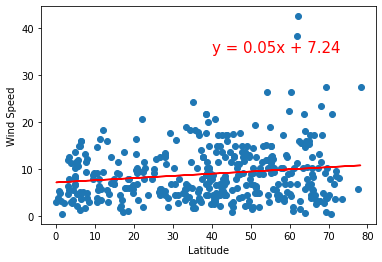

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

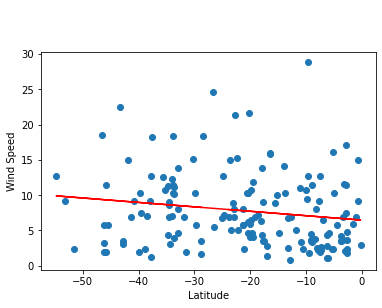

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))